# Case Study 2 – Electric Vehicle Support Infrastructure

#### 🔴 Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#%matplotlib inline

from IPython.display import display

## ⭐ Task 1: Basic Analysis
Traffic counts provides street-level traffic data for every junction-to-junction link on the 'A' road and motorway
network in Great Britain. </br> 
The historic data for 2000 to 2020 can be found here:

https://roadtraffic.dft.gov.uk/downloads (Number of vehicles that travel past the count point (in both directions) on an average day of the year. 2000 - 2020)

You should use the AADF Data major and minor roads. </br>
Your first task is to perform a basic clean up and summary analysis of the data. </br>
Your objective is to summarise the data in a way that simplifies the subsequent tasks. </br>
A region by region estimate of the annual millage of different classes of vehicles is a good starting point. </br>
Note, the data is missing from much of the minor roads and you should address this is a sensible way. 

### 🔵 1.1 Explore Dataset
- Import dataset
- Display first 5 rows
- Summarise raw data using `.describe()`
- Display number of unique and missing values in each column

🟥 Import and Display

In [2]:
# Import dataset and display 5 rows
file = "dft_traffic_counts_aadf.csv"
df = pd.read_csv(file, index_col=0, header=0)
df.head(10)

,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,easting,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
id,,,,,,,,,,,,,,,,,,,,,
1,27294,2019,5,85,A560,PA,Major,LA Boundary,M56,380000,...,391,2768,158,54,24,7,2,8,253,25927
2,1153,2019,3,30,A905,PA,Major,M9,M9 slip,292310,...,35,1787,192,99,72,25,391,216,996,12959
3,8024,2019,9,80,M20,TM,Major,2,2,561000,...,149,9592,1167,192,269,403,3799,1788,7619,55977
4,20505,2019,4,6,A48(M),TM,Major,LA Boundary,29A,325000,...,276,5603,1052,140,230,106,508,1186,3222,47203
5,46628,2019,5,162,A62,PA,Major,A62 Manchester St roundabout,A627 King St,392080,...,186,7242,629,152,152,37,120,196,1285,55089
6,56238,2019,8,100,A19,PA,Major,A19,A1041,461300,...,161,1004,58,4,2,8,4,4,81,9456
7,26304,2019,9,133,A27,TA,Major,A26 West,A26 East,543854,...,153,6573,856,221,225,103,249,267,1921,36734
8,46292,2019,9,133,A26,PA,Major,"B2157 Eridge Rd, Crowborough",LA Boundary,555000,...,75,2024,208,49,54,52,70,82,515,14561
9,47481,2019,8,100,A684,PA,Major,"Mowbray Rd, Northallerton",A19,440000,...,58,1508,199,30,29,17,23,28,327,9365


In [3]:
df.columns

Index(['count_point_id', 'year', 'region_id', 'local_authority_id',
       'road_name', 'road_category', 'road_type', 'start_junction_road_name',
       'end_junction_road_name', 'easting', 'northing', 'latitude',
       'longitude', 'link_length_km', 'link_length_miles', 'sequence', 'ramp',
       'estimation_method', 'estimation_method_detailed', 'pedal_cycles',
       'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches',
       'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
       'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
       'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs',
       'all_motor_vehicles'],
      dtype='object')

🟥 Data Types

In [4]:
df.dtypes

count_point_id                    int64
year                              int64
region_id                         int64
local_authority_id                int64
road_name                        object
road_category                    object
road_type                        object
start_junction_road_name         object
end_junction_road_name           object
easting                           int64
northing                          int64
latitude                        float64
longitude                       float64
link_length_km                  float64
link_length_miles               float64
sequence                        float64
ramp                            float64
estimation_method                object
estimation_method_detailed       object
pedal_cycles                      int64
two_wheeled_motor_vehicles        int64
cars_and_taxis                    int64
buses_and_coaches                 int64
lgvs                              int64
hgvs_2_rigid_axle                 int64


🟥 Dataset Statistics

In [5]:
df.describe()

,count_point_id,year,region_id,local_authority_id,easting,northing,latitude,longitude,link_length_km,link_length_miles,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
count,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,4.891590e+05,489159.000000,489159.000000,376392.000000,376392.000000,...,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000
mean,250057.397012,2010.412772,5.928929,98.314374,421932.315153,3.282030e+05,52.841607,-1.701621,2.813195,1.747747,...,186.831572,2153.871502,361.230984,64.755172,70.810379,53.712543,184.978062,217.199900,952.666685,16803.646886
std,371234.172211,6.031980,3.012450,53.181064,99125.149979,1.851147e+05,1.664812,1.471638,3.837195,2.384518,...,326.062909,2775.208885,600.438557,108.290034,133.369543,150.275483,652.558431,784.359703,2178.980990,20227.192102
min,51.000000,2000.000000,1.000000,1.000000,65412.000000,1.021700e+04,49.912239,-7.510269,0.070000,0.040000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28739.000000,2005.000000,3.000000,63.000000,352970.000000,1.810350e+05,51.514818,-2.706988,0.600000,0.370000,...,29.000000,582.000000,63.000000,10.000000,5.000000,3.000000,2.000000,2.000000,104.000000,4660.000000
50%,58387.000000,2010.000000,6.000000,91.000000,423460.000000,2.916280e+05,52.514906,-1.648168,1.500000,0.930000,...,85.000000,1409.000000,182.000000,32.000000,26.000000,12.000000,17.000000,19.000000,325.000000,11509.000000
75%,99316.000000,2016.000000,9.000000,139.000000,505069.000000,4.110000e+05,53.593429,-0.462616,3.300000,2.050000,...,205.000000,2536.000000,387.000000,72.000000,76.000000,39.000000,80.000000,89.000000,769.000000,20434.000000
max,999999.000000,2020.000000,11.000000,210.000000,655040.000000,2.187789e+06,69.523878,1.754553,66.100000,41.070000,...,11359.000000,40479.000000,10942.000000,5968.000000,3938.000000,3949.000000,15681.000000,15115.000000,31198.000000,262842.000000


🟥 Unique Values and NaNs

In [6]:
# Uniques and NaNs
data = []
for i in df.columns:
    data.append([i, df[i].unique().shape[0], df[i].isnull().sum().sum()])
    
data = pd.DataFrame(data, columns=['Name', 'Unique Count', 'Nan Count']).set_index(['Name'])
data

,Unique Count,Nan Count
Name,,
count_point_id,45332,0
year,21,0
region_id,11,0
local_authority_id,210,0
road_name,3779,0
road_category,6,0
road_type,2,0
start_junction_road_name,9110,113133
end_junction_road_name,9057,113124


🟥 Observe Minor Road NaNs

In [7]:
df[df['link_length_miles'].isna()]['road_type'].unique()

array(['Minor'], dtype=object)

🟥 Deal with Missing Length in minor roads

In [8]:
df[df['road_type'] == 'Minor']['link_length_miles'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: link_length_miles, dtype: float64

## [Minor Roads Source](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fassets.publishing.service.gov.uk%2Fgovernment%2Fuploads%2Fsystem%2Fuploads%2Fattachment_data%2Ffile%2F1059892%2Frdl0103.ods&wdOrigin=BROWSELINK&fbclid=IwAR3pvimXGk1VHtNMWiOEG7NXOX5z6c5wgXtlH8v_j7Av62V30TKfKToWjvs)

In [9]:
df_minor_roads = pd.read_excel('minor_road_lengths.xlsx')[['Year', 'All minor roads']]
df_minor_roads.rename(columns = {'All minor roads': 'minor_road_length_miles', 'Year': 'year'}, inplace=True)
df_minor_roads.index = df_minor_roads.year
df_minor_roads.drop('year', axis=1, inplace=True)
# Keep years 2000 - 2020
df_minor_roads = df_minor_roads.iloc[-22:]
df_minor_roads = df_minor_roads.iloc[:-1]
df_minor_roads

,minor_road_length_miles
year,
2000,211367
2001,211787
2002,212206
2003,212641
2004,209702
2005,209918
2006,213809
2007,214110
2008,213887


In [10]:
# Import total minor road length
df_minor_roads = pd.read_excel('minor_road_lengths.xlsx')[['Year', 'All minor roads']]
df_minor_roads.rename(columns = {'All minor roads': 'minor_road_length_miles', 'Year': 'year'}, inplace=True)
df_minor_roads.index = df_minor_roads.year
df_minor_roads.drop('year', axis=1, inplace=True)
# Keep years 2000 - 2020
df_minor_roads = df_minor_roads.iloc[-22:]
df_minor_roads = df_minor_roads.iloc[:-1]
df_minor_roads

# Calculate number of minor roads per year
minor_road_count = {}
for year in range(2000, 2021):
    minor_road_count[year] = df[(df.road_type == 'Minor') & (df.year == year)].road_name.unique().shape[0]
    
minor_road_count = pd.DataFrame(pd.Series(minor_road_count), columns=['number_of_roads'])

# Calculate average length of minor road for each year
mean_minor_road_length = df_minor_roads.values / minor_road_count.values

# Calculate average 
minor_count = df[df.road_type == 'Minor'].groupby('year').sum()['all_motor_vehicles']

# Calculate average mileage for minor roads each year
annual_minor_mileage_billions = np.multiply(mean_minor_road_length.flatten(), minor_count.values) * 365 / 1e9

### 🔵 1.2 Report Annual Mileage


🟥 Per Region

In [24]:
df_region

,year,region_name,mileage (billions)
0,2000,East Midlands,17.237847
1,2000,East of England,15.489089
2,2000,London,16.038601
3,2000,North East,9.640081
4,2000,North West,21.540255
...,...,...,...
226,2020,South East,19.740118
227,2020,South West,14.375828
228,2020,Wales,28.390479
229,2020,West Midlands,15.823015


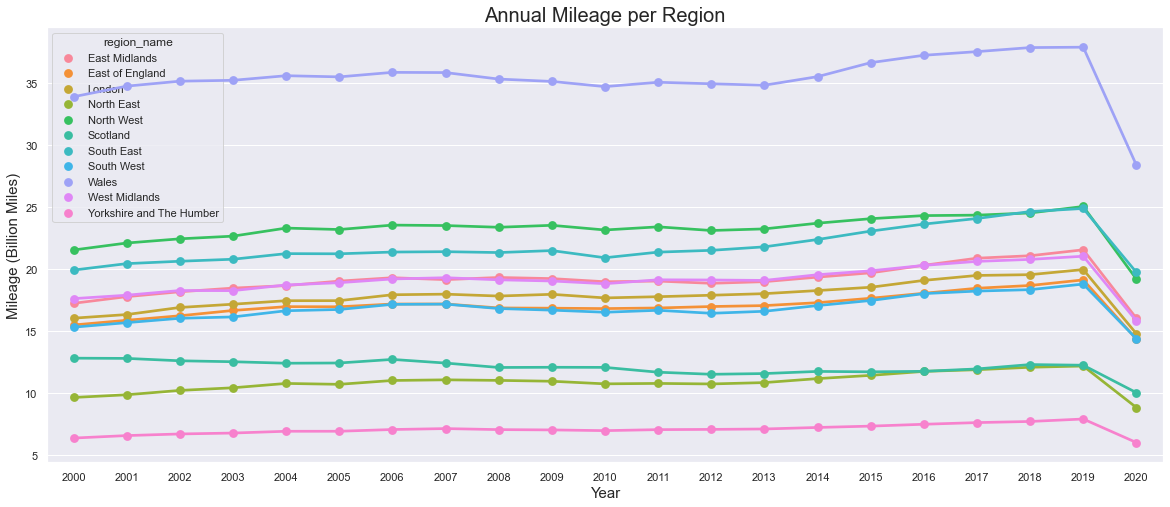

In [11]:
# Replace region id with region names
region_names = {1: 'East Midlands', 
                2: 'East of England', 
                3: 'London',
                4: 'North East', 
                5: 'North West', 
                6: 'Scotland', 
                7: 'South East', 
                8: 'South West', 
                9: 'Wales', 
                10: 'West Midlands', 
                11: 'Yorkshire and The Humber'}

df['region_name'] = df['region_id'].map(region_names)

# Create mileage column and dataset grouped by year and region
df['mileage (billions)'] = (df['link_length_miles'] * df['all_motor_vehicles']) * 365 / 1e9
df_region = df[['year', 'region_name', 'mileage (billions)']].copy()
df_region = df_region.groupby(['year', 'region_name']).sum()
df_region.reset_index(inplace=True)
df_region = df_region.rename(columns = {'index':'year'})
# Plot
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 8))
sns.pointplot(x='year', y='mileage (billions)', data=df_region, ci=None, hue='region_name')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Mileage (Billion Miles)', fontsize=15)
plt.title('Annual Mileage per Region', fontsize=20)
plt.show()

🟥 Per Vehicle Type

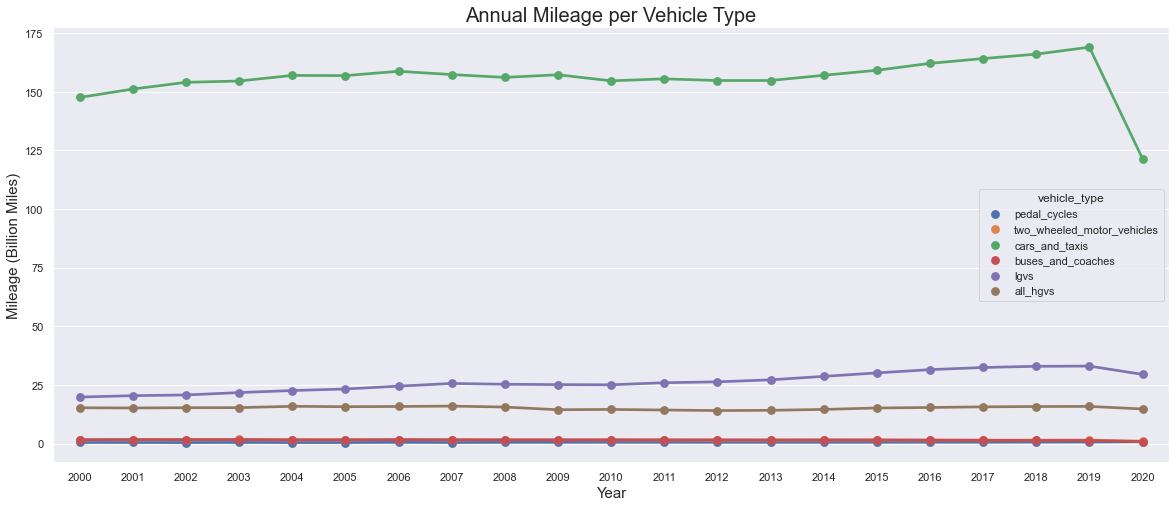

In [12]:
# Create dataset grouped by vehile
# Keep useful columns

df_vehicle = df[['year', 'link_length_miles', 'pedal_cycles',
       'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches',
       'lgvs', 'all_hgvs']].copy()
# Get mileage for each vehicle
vehicle_types = ['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'all_hgvs']
for vt in vehicle_types: 
    df_vehicle[vt] = (df_vehicle[vt] * df_vehicle['link_length_miles']) * 365 / 1e9
# Group by year and sum
df_vehicle = df_vehicle.groupby('year').sum()
# Drop link length 
df_vehicle.drop('link_length_miles', axis=1, inplace=True)
# Group by vehicle type
df_vehicle.reset_index(inplace=True)
df_vehicle = df_vehicle.rename(columns = {'index':'year'})
df_vehicle = df_vehicle.melt("year",var_name="vehicle_type")
# Plot
plt.figure(figsize=(20,8))
sns.set_theme(style="darkgrid")
sns.pointplot(x='year', y='value', data=df_vehicle, ci=None, hue='vehicle_type')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Mileage (Billion Miles)', fontsize=15)
plt.title('Annual Mileage per Vehicle Type', fontsize=20)
plt.show()

## ⭐ Task 2: Regression
In this task you should use the summary data to perform a regression analysis to estimate likely changes in traffic over the next thirty years. </br>
You should identify any potential risks associated with this analysis that may place limits on how it can be used.

### 🔵 2.1 Choose and Justify Regression Model

For our regression task, the ARIMA model was chosen [[Source 1]](https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html). </br>
The ARIMA model is a popular statistical method for time series forecasting [[Source 2]](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) which is what we are interested in. </br>
This model is appropriate for this task because it takes into account the known values of the time series, the lags, and the lagged forecast errors to forecast future values in a comprehensive way that includes an appropriate confidence interval [[Source 3]](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/). 

In [13]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

### 🔵 2.2 Apply Regression Model
- Create dataset to train an ARIMA model
- Train and predict annual mileage for all vehicles for the next 30 years (until 2050)

In [14]:
# Create regression dataset 
df_regression = df[['year', 'mileage (billions)']].copy()
df_regression['year'] = pd.to_datetime(df_regression['year'], format='%Y')
df_regression.index = df_regression.year
df_regression = df_regression.drop('year', axis=1)
df_regression = df_regression.groupby('year').sum()
df_regression = df_regression + 80

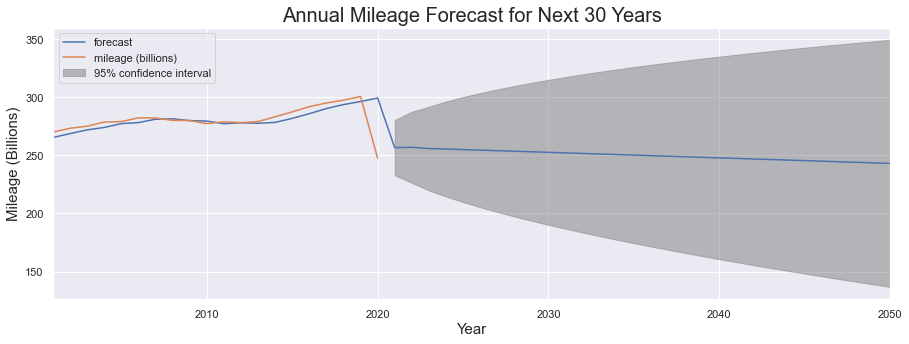

In [15]:
# TODO: Remove Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="darkgrid")

# Define and fit model
model = ARIMA(df_regression, order=(2,1,0), freq=df_regression.index.inferred_freq)
fit = model.fit(disp=0)
# Plot predictions
fig = fit.plot_predict(1, 50)
fig.set_figheight(5)
fig.set_figwidth(15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Mileage (Billions)', fontsize = 15)
plt.title('Annual Mileage Forecast for Next 30 Years', fontsize = 20)
plt.legend(loc='upper left')
plt.show()

In [16]:
mileage_preds = fit.forecast(steps=30)
mileage_mean_preds = mileage_preds[0]
mileage_mean_preds

array([256.61717141, 256.95335548, 255.86110216, 255.45858344,
       254.99862309, 254.5155443 , 254.03953938, 253.56335933,
       253.08686579, 252.61043866, 252.13401459, 251.65758672,
       251.1811594 , 250.70473216, 250.22830488, 249.7518776 ,
       249.27545033, 248.79902305, 248.32259578, 247.8461685 ,
       247.36974122, 246.89331395, 246.41688667, 245.9404594 ,
       245.46403212, 244.98760485, 244.51117757, 244.03475029,
       243.55832302, 243.08189574])

### 🔵 2.3 Identify Potential Risks in Using the Model
This forecast includes data from 2020 which is heavily influenced by the covid-19 lockdown. Because of this, the model may forecast mileage that is too high if there will be more lockdowns (and less transportation) in the future, or mileage that is too low if lockdowns end and transportation goes back to normal. This fact should be taken into account when using these predictions even when considering the edge-cases of the 95% confidence interval.

## ⭐ Task 3: Research
As your objective is to assess the impact of the expected increase in the number and use of electric vehicles, you will
need to research published estimates of how much of the UK vehicle fleet will be electric over time. This is unlikely
to be a simple regression using historic data, there will be a number of other factors involved. It is these factors and
their impact that you need to identify.
Your goal is to estimate the number of electric miles driven each year over the time period and estimate how much
power generation will be needed to achieve this. You will need to identify how much additional generation capacity
this will require. You should also attempt to locate at least one other independent estimate of this for comparison to
your own estimate.

### 🔵 3.1 Estimate Electric Miles
**Dataset**: % of new cars that are electric with forecasting up to 2050 [[Source]](https://www.zap-map.com/ev-market-statistics/#:~:text=As%20shown%20in%20the%20chart,BEV%20and%207.0%25%20PHEV). </br>
**NB**: Hybrids were not taken into account so this may be an underestimate. </br>
**NB**: Assumption: the average electric vehicle has approximately the same mileage as non-electric. </br>

**Import Dataset**


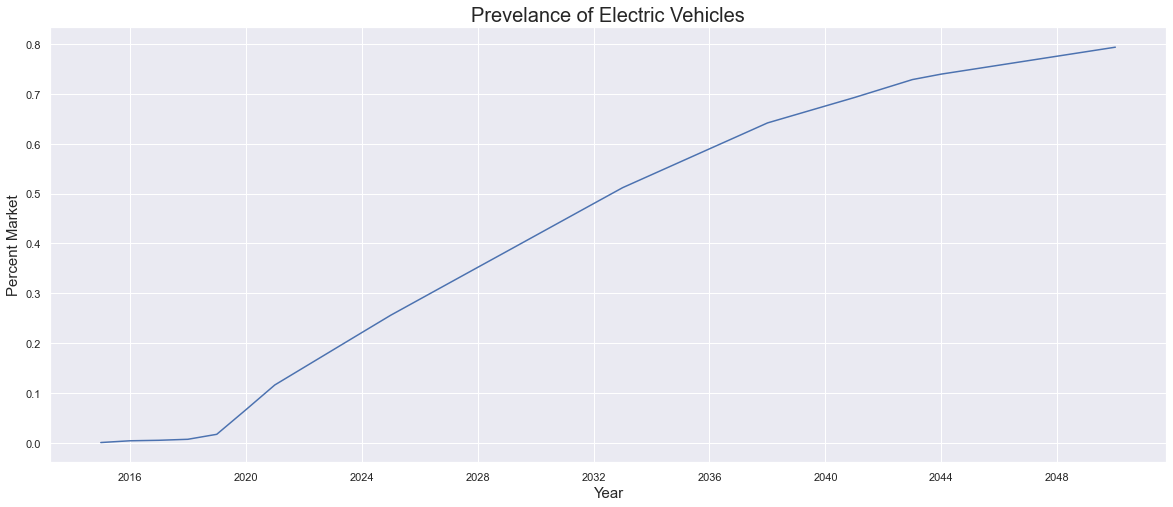

In [17]:
# Import Dataset
electric_percent = pd.read_excel('electric_mileage_percent.xlsx')
electric_percent['year'] = pd.to_datetime(electric_percent['year'], format='%Y')
electric_percent.index = electric_percent.year
electric_percent = electric_percent.drop('year', axis=1)
plt.figure(figsize=(20,8))
plt.plot(electric_percent)
plt.xlabel('Year', size=15)
plt.ylabel('Percent Market', size=15)
plt.title('Prevelance of Electric Vehicles', size=20)
plt.show()

**Forecast**

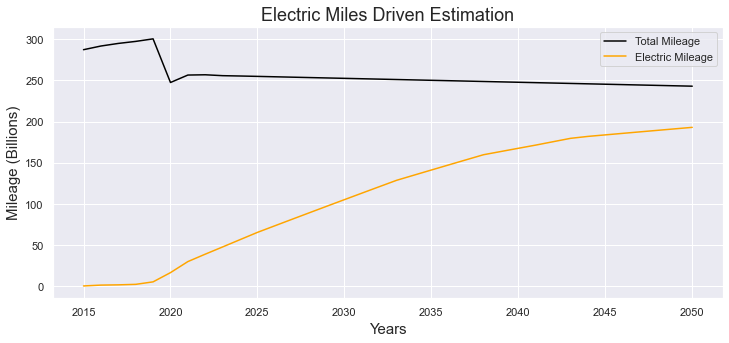

In [18]:
# Build plot datasets
total_forecast = mileage_mean_preds
total_from2015 = df_regression.values[-6:].flatten()
total_mileage = np.concatenate((total_from2015, total_forecast))
electric_mileage = total_mileage * electric_percent.values.flatten()
years = np.arange(2015, 2051)

# Plot datasets
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,5))
plt.plot(years, total_mileage, c = 'black', label = 'Total Mileage')
plt.plot(years, electric_mileage, c = 'orange', label = 'Electric Mileage')
plt.xlabel('Years', size=15)
plt.ylabel('Mileage (Billions)', size=15)
plt.legend()
plt.title('Electric Miles Driven Estimation', size=18)
plt.show()

### 🔵 3.2 Estimate Necessary Power Generation

To estimate the amount of power generation to facilitate this increase in electric miles driven, we will use the average energy consumption of electric vehicles as mentioned in this 
[Electric Vehicle Database](https://ev-database.uk/cheatsheet/energy-consumption-electric-car). </br>
Multiplying the 314Wh/mi figure with the annual electric mileage, we get the expected annual power consumption of electric vehicles (and hence necessary power generation). </br>
Finally, using the annual electricity consumption figure from [statista](https://www.statista.com/statistics/322874/electricity-consumption-from-all-electricity-suppliers-in-the-united-kingdom/) we get the additional power generation needed. 

**NB**: Assumed all vehicles will be used the same by using the average energy consumption figure. 

🟥 Estimate Power Consumption

[4.51279210e-02 3.66648783e-01 4.63265322e-01 6.53983036e-01
 1.60479182e+00 5.13050446e+00 9.34702385e+00 1.21831864e+01
 1.49433118e+01 1.77272929e+01 2.04978093e+01 2.30163497e+01
 2.55258929e+01 2.80258510e+01 3.05162019e+01 3.29969859e+01
 3.54681961e+01 3.79298315e+01 4.03818926e+01 4.23520518e+01
 4.43144319e+01 4.62690328e+01 4.82158547e+01 5.01548975e+01
 5.13844015e+01 5.26088191e+01 5.38281504e+01 5.51199199e+01
 5.64063039e+01 5.71467251e+01 5.77297039e+01 5.83099898e+01
 5.88875830e+01 5.94624834e+01 6.00346910e+01 6.06042059e+01]


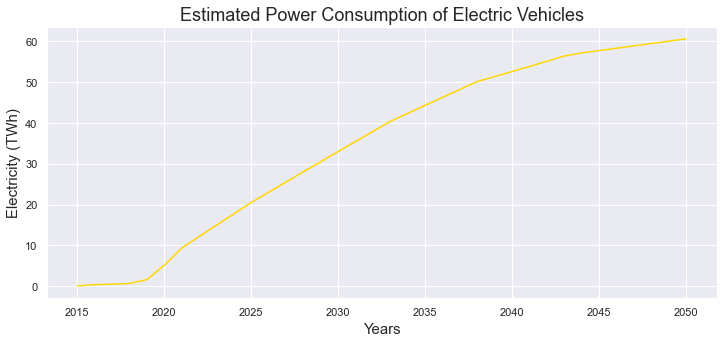

In [19]:
# Calculate power consumption
average_power_per_mile = 314
average_annual_power_consumption = electric_mileage * 1e9 * average_power_per_mile / 1e12
print(average_annual_power_consumption)
# Plot datasets
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,5))
plt.plot(years, average_annual_power_consumption, c = 'gold')
plt.xlabel('Years', size=15)
plt.ylabel('Electricity (TWh)', size=15)
plt.title('Estimated Power Consumption of Electric Vehicles', size=18)
plt.show()

🟥 Estimate Additional Power Generation Needed

In [20]:
# Import Annual Energy Consumption Dataset
electricity_consumption = pd.read_excel('electricity-consumption-in-the-uk-2000-2021.xlsx')
electricity_consumption.index = electricity_consumption.year
electricity_consumption.drop('year', axis=1,  inplace=True)
electricity_consumption

,power (TWh)
year,
2000,340.31
2001,342.51
2002,344.12
2003,346.63
2004,347.72
2005,357.20
2006,353.86
2007,351.45
2008,350.10


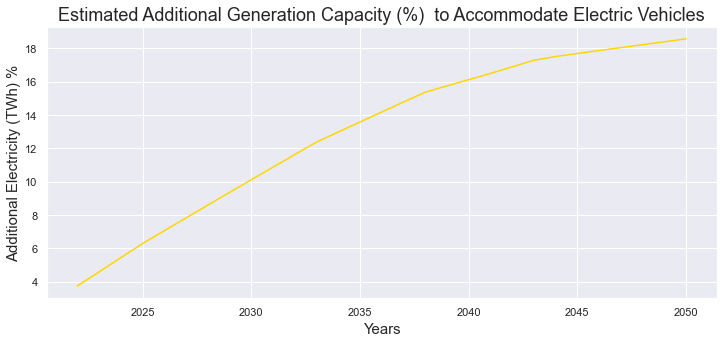

In [21]:
# Plot
additional_electricity = electricity_consumption.mean().values[0]
# Calculate power consumption
additional_power_generation_needed = average_annual_power_consumption / additional_electricity * 100
# Plot datasets
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,5))
plt.plot(years[7:], additional_power_generation_needed[7:], c = 'gold')
plt.xlabel('Years', size=15)
plt.ylabel('Additional Electricity (TWh) %', size=15)
plt.title('Estimated Additional Generation Capacity (%)  to Accommodate Electric Vehicles', size=18)
plt.show()

### 🔵 3.3 Identify One or More Independent Estimates of the Likely Generation Required


Our approximation is close to the following estimation [[source]](https://www.virta.global/blog/myth-buster-electric-vehicles-will-overload-the-power-grid) which predicts that **"if 80% of all passenger cars become electric, this would lead to a total increase of 10-15% in electricity consumption".** </br>
It is also a close estimate to [this estimation](https://www.carboncommentary.com/blog/2017/7/26/100-evs-can-be-easily-accommodated-on-the-uk-grid) which states that **if all cars were to go electric the additionala electricity generation required would rise by about 20%.**


## ⭐ Task 4: Recommendation
Different generation technologies have different £/MWh figures. The Department for business, energy and strategy
(BEIS) maintains a regularly updated overview of generation technologies.
https://www.gov.uk/government/collections/energy-generation-cost-projections
Using this and other sources, you should make a recommendation of the amount and type of new generation
capacity that will be needed to meet demand at the lowest overall cost. This is in part an optimisation problem. For
example, you might need to take into account the impact that the time of day at which charging occurs will have on
the mix of generation technologies that are appropriate.

[**Dataset Source**](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/911817/electricity-generation-cost-report-2020.pdf)

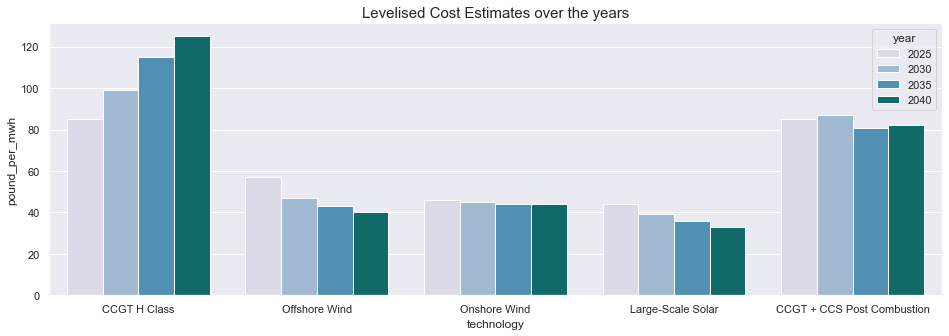

In [22]:
# Costs. Pound per mwh refers to the cost per energy unit when taking into account all factors, including construction cost and insurance, over the lifetime of the technology. 
beis_costs = pd.read_excel('beis_costs.xlsx')

plt.figure(figsize=(16,5))
ax = sns.barplot(x='technology', y='pound_per_mwh', data=beis_costs, hue="year", palette='PuBuGn')
plt.title('Levelised Cost Estimates over the years', fontsize=15)
plt.show()

### Optimisation Parameters
**Electric Vehicle Charging Times** </br>
https://energysavingtrust.org.uk/advice/charging-electric-vehicles/</br>
About 20% occurs during the day, so 20% solar. </br>

https://www.energy.gov/eere/wind/articles/top-10-things-you-didnt-know-about-offshore-wind-energy</br>
On-shore tends to be stronger at night according to this source.

**The Following Data is From:**
https://www.gov.uk/government/publications/beis-electricity-generation-costs-2020

**1. Load Factor (Average energy produced / Peak energy produced)**</br>
How consistent a technology is at energy production. 
From best to worst: 
1. 93% CCGT H Class
2. 89% CCGT + CCS Post Combustion
3. 57% Off-shore Wind
4. 34% On-shore Wind
5. 11% Solar 

**2. Plant Size (Ascending Order)**
1. Solar
2. On-shore Wind
3. Off-shore Wind (significantly larger than on-shore)
4. CCGT + CCS Post Combustion
5. CCGT H Class

**3. Hurdle Rates** </br>
Higher hurdle rate = higher risk of project
Low hurdle rate = low risk
1. 5.0% Solar 
2. 5.2% On-shore Wind
3. 6.3% Off-shore Wind (significantly larger than on-shore)
4. 9.0% CCGT + CCS Post Combustion
5. 7.5% CCGT H Class

**4. Cost </br>**
See figure above

### Optimisation (done in excel file). From 2025 to 2040:
**CCGT H Class**: 18%, 12%, 6%, 0%.
**On-shore Wind**: 22%, 20%, 18%, 16%.
**Off-shore Wind**: 22%, 24%, 26%, 28%.
**Solar**: 18%, 20%, 22%, 24%.
**CCGT + CCS Post Combustion**: 20%, 24%, 28%, 32%.



### Optimisation Intuition
**Solar**: 
- Pros: Cheapest, Safest, Fewest Land Needs
- Cons: Least reliable especially during the night. 
- Ascending proportion because of descending prices over the years. 

**On-shore Wind**: 
- Pros: 2nd Cheapest, 2nd Safest, 2nd Least Land Needs, 
- Cons: Unreliable compared to off-shore, CCGT + CSS and CCGT H Class. 
- Descending proportion because of off-shore's descending cost. 

**Off-shore Wind**: 
- Pros: 3rd Cheapest (to become 2nd), 3rd Safest, 3rd Least Land Needs, 
- Cons: Unreliable compared to CCGT + CSS and CCGT H Class. 
- Ascending proportion because of descending cost. 

**CCGT + CCS Post Combustion**: 
- Pros: 2nd most reliable (which is needed for consistent energy supply). 
- Cons: Cost, risk, land needs
- Ascending proportions because of CCGT H Class ascending cost. 

**CCGT H Class**: 
- Pros: 1st most reliable
- Cons: Cost, risk, land needs.
- Becomes most expensive and redundant over the years. 

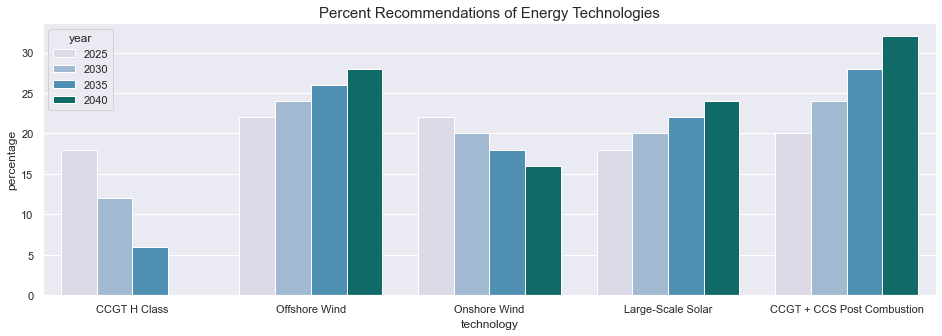

In [23]:
# Plot
recommendations = pd.read_excel('recommendations.xlsx')
plt.figure(figsize=(16,5))
ax = sns.barplot(x='technology', y='percentage', data=recommendations, hue="year", palette='PuBuGn')
plt.title('Percent Recommendations of Energy Technologies', fontsize=15)
plt.show()

## ⭐ Task 5: Executive Summary
You should summarise the key points of your case study presentation in a one page executive summary. Key points
include important results, assumptions and conclusions. This document should also contain your bibliography. The
bibliography will not count towards the one page limit.